In [236]:
%matplotlib inline
width = 10
height = 8
plt.rcParams["figure.figsize"] = (width, height)

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import itertools

In [237]:
dataset = 'synergy-final-iter2'
features = 'Mic'

activities = [
   'Dishes',
   'Microwave',
   'Coffee',
   'Null',
   'Faucet',
   'Kettle',
   'Chopping food',
   'Conversation',
   'Eating popcorn',
   'Making popcorn in microwave',
   'Phone vibrating'
]

In [238]:
with open('../scripts/configuration.json') as f:
    configuration = json.load(f)

df = pd.DataFrame.from_csv('../scripts/results/results_no_transfer.csv', index_col=None)
df = df[df['dataset'] == configuration['datasets'].index(dataset)]
devices = configuration['devices']
device_roles = configuration['device_roles'][dataset]
df['device_name'] = [device_roles[devices[i]] for i in df['device']]
df = df.sort_values(by='device_name')
without_fs = df[df['feature_selection'] == 0]

In [239]:
def plot(df, features, with_feature_selection):
    df = df[df['feature'] == configuration['feature_names'].index(features)]

    df_with_feature_selection = df[df['feature_selection'] == (1 if with_feature_selection else 0)]
    ax = df_with_feature_selection.boxplot('accuracy', by='device_name', rot=90)
    ax.set_ylim(0, 1)
    title = 'With feature selection: ' if with_feature_selection else 'Without feature selection: '
    title += features
    plt.title(title)
    plt.suptitle('')
    plt.tight_layout()


def confusion_matrix(df, title):
    # find column with the larget number as name
    last_column = 0
    for column in df.columns:
        if column.isdigit():
            if last_column < int(column):
                last_column = int(column)

    starting_column = last_column - (len(activities) * len(activities))
    # columns = [str(i) for i in range(starting_column, last_column + 1)]

    cm = []
    for i in range(len(activities)):
        values = []
        for n in range(len(activities)):
            k = (n + 1) + len(activities) * (i)
            column = str(starting_column + k)
            value = np.sum([-1 if np.isnan(i) else int(i) for i in df[column]])
            values.append(value)

        cm.append(values)

    cm = np.array(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(activities))
    plt.xticks(tick_marks, activities, rotation=45)
    plt.yticks(tick_marks, activities)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True activity')
    plt.xlabel('Predicted activity')

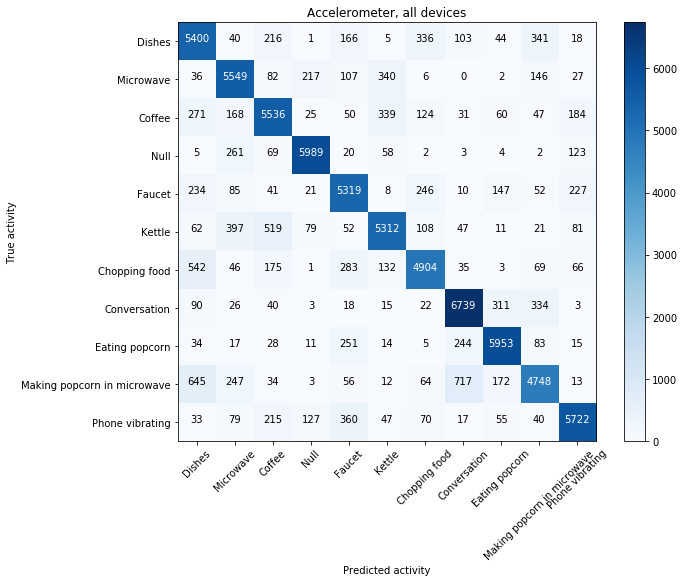

In [240]:
subdf = without_fs[without_fs['feature'] == configuration['feature_names'].index('Accel')]
confusion_matrix(subdf, 'Accelerometer, all devices')

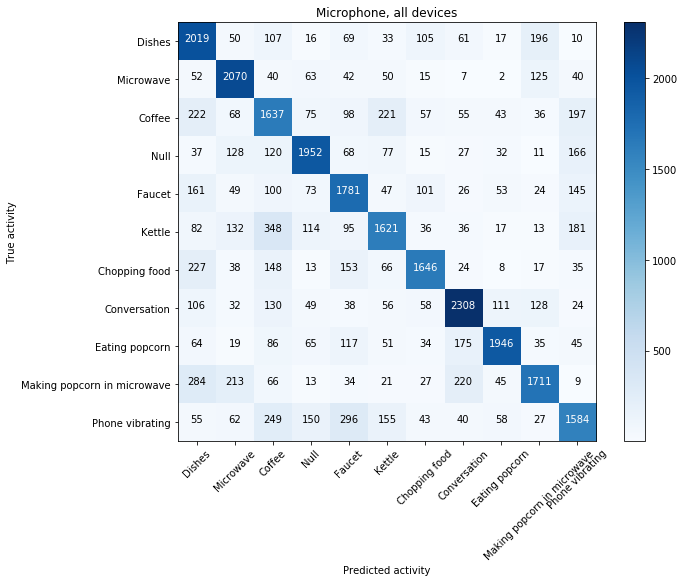

In [241]:
subdf = without_fs[without_fs['feature'] == configuration['feature_names'].index('Mic')]
confusion_matrix(subdf, 'Microphone, all devices')

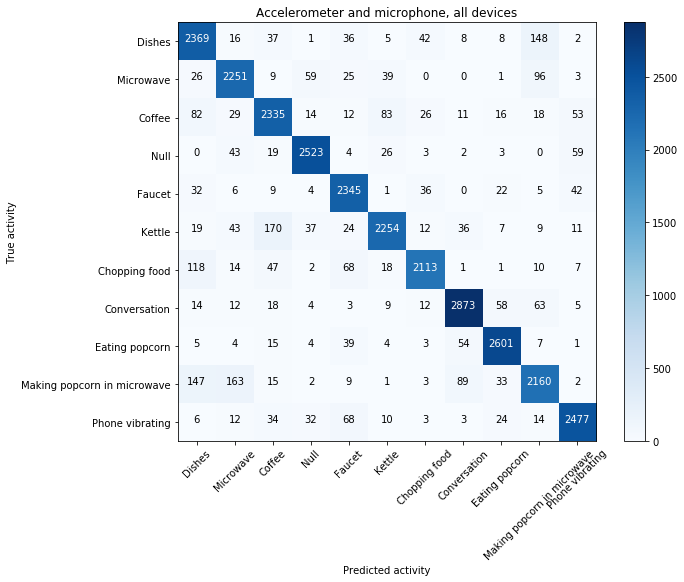

In [242]:
subdf = without_fs[without_fs['feature'] == configuration['feature_names'].index('Accel & mic')]
confusion_matrix(subdf, 'Accelerometer and microphone, all devices')

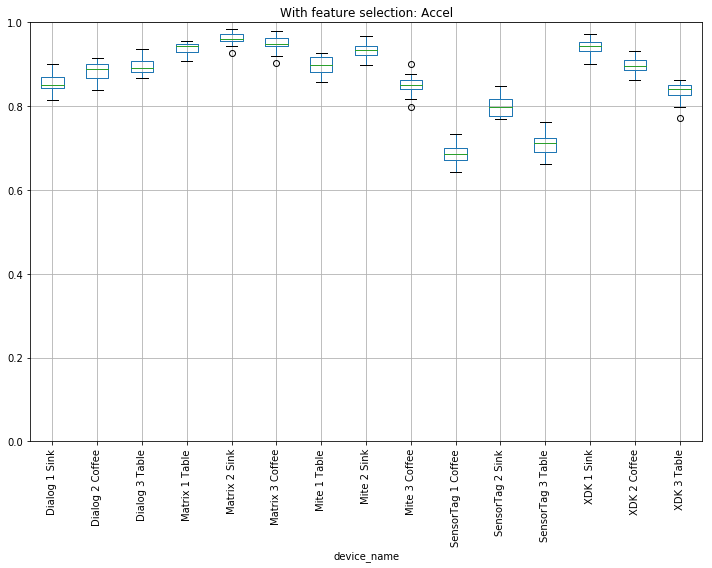

In [243]:
plot(df, 'Accel', True)

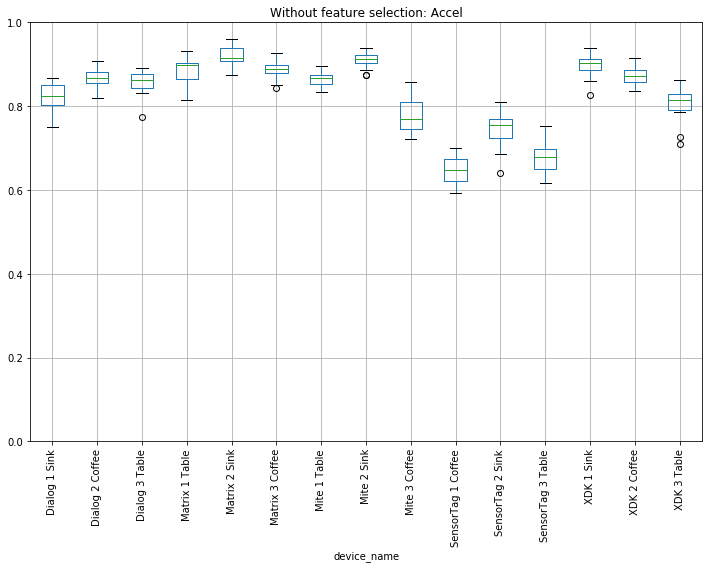

In [244]:
plot(df, 'Accel', False)

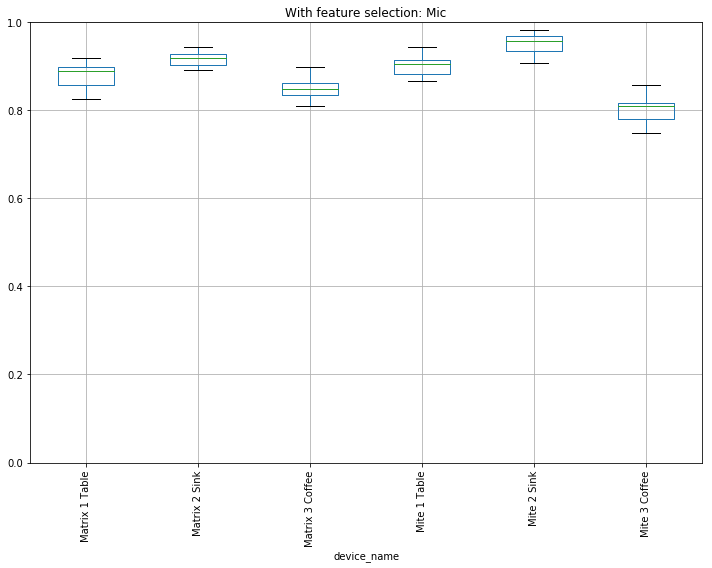

In [245]:
plot(df, 'Mic', True)

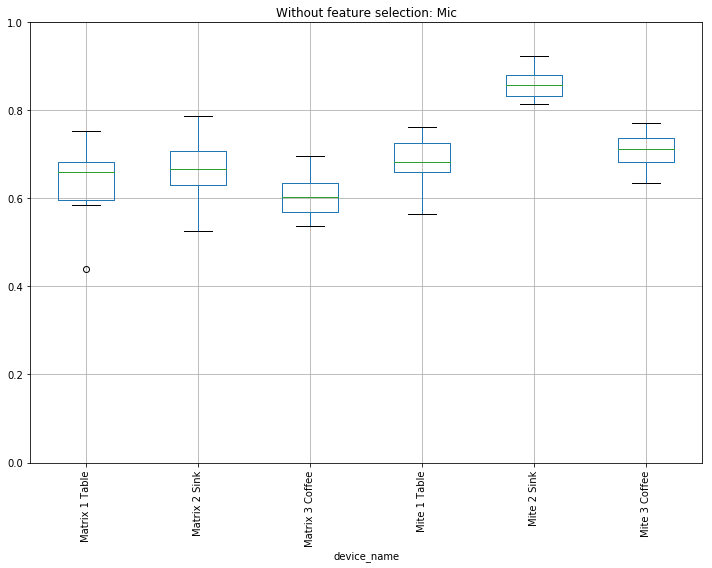

In [246]:
plot(df, 'Mic', False)

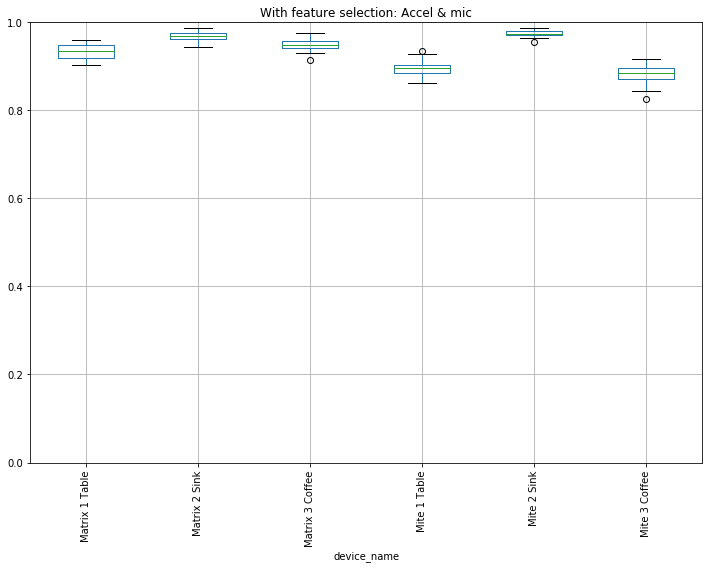

In [247]:
plot(df, 'Accel & mic', True)

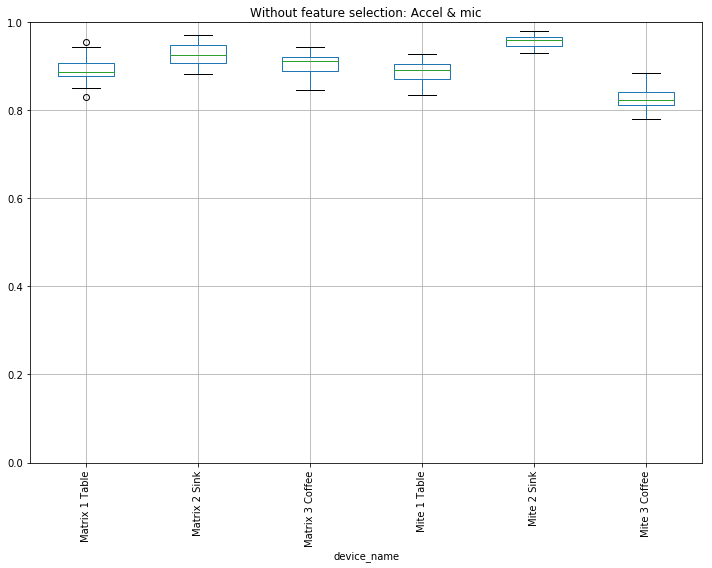

In [248]:
plot(df, 'Accel & mic', False)